In [1]:
# ! jupyter nbconvert --to script Task8.ipynb


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow.keras import layers, models

2024-01-15 23:27:21.803495: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-15 23:27:21.805564: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-15 23:27:21.830599: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 23:27:21.830620: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 23:27:21.831366: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

### Loading MNIST Data :

In [3]:
(train_images, train_labels) , (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [4]:
assert train_images.shape == (60000, 28, 28)
assert test_images.shape == (10000, 28, 28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

## EDA on Data : 

In [5]:
print("Training set images shape:", train_images.shape)  
print("Training set labels shape:", train_labels.shape)
print("Test set images shape:", test_images.shape) 
print("Test set labels shape:", test_labels.shape)


Training set images shape: (60000, 28, 28)
Training set labels shape: (60000,)
Test set images shape: (10000, 28, 28)
Test set labels shape: (10000,)


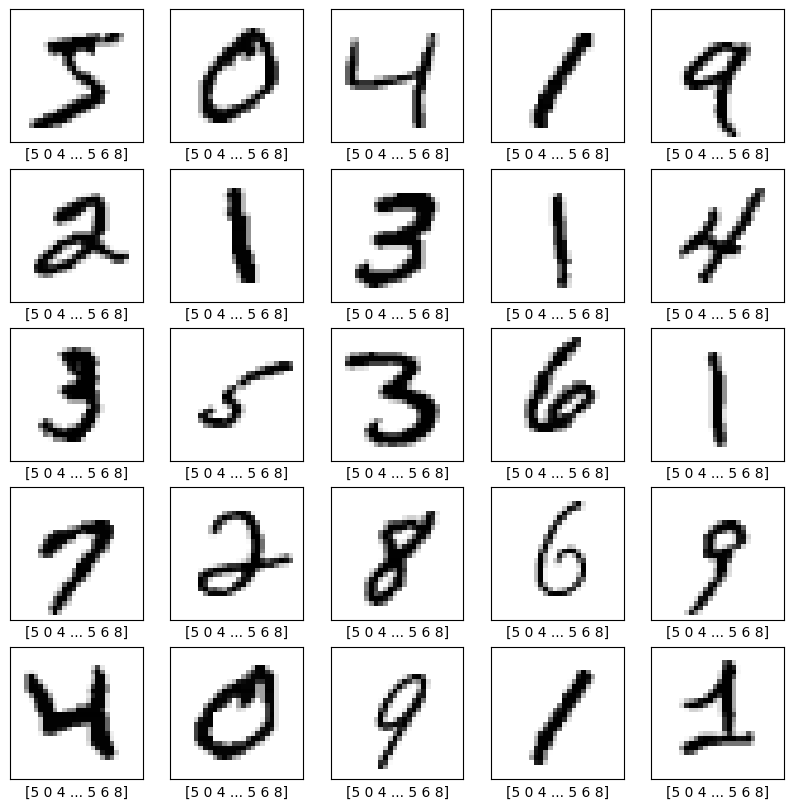

In [6]:
plt.figure(figsize=(10,10))
for i in range(25): 
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels)
plt.show()

### Checking the distribution of Labels : 

In [7]:
unique, counts = np.unique(train_labels,return_counts=True)
print("Train labels distribution:", dict(zip(unique, counts)))

unique, counts = np.unique(test_labels, return_counts=True)
print("Test labels distribution: ", dict(zip(unique,counts)))

Train labels distribution: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels distribution:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


####  reshaping the data to include a channel dimension

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape for CNN input
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

## Task 1 : 

### Selecting a Random Sample : 

In [9]:
random_index = np.random.randint(0,len(train_images))
sample_image, sample_label = train_images[random_index], train_labels[random_index]

In [10]:
sample_label

1

### Plotting the Sample : 

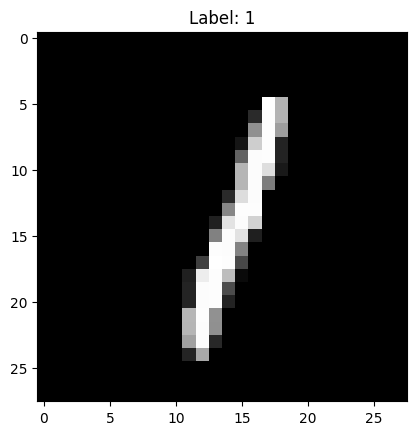

In [11]:
plt.imshow(sample_image,cmap='gray')
plt.title(f'Label: {sample_label}')
plt.show()

### Examples of activation functions : 

Five commonly used activation functions in neural networks:

<b>ReLU (Rectified Linear Unit)</b><br>
<b>Formula:</b> f(x) = max(0, x)<br>
<b>Description:</b> ReLU is widely used due to its simplicity and efficiency. It outputs the input directly if it's positive, otherwise, it outputs zero.<br><br>

<b>Sigmoid</b><br>
<b>Formula:</b> f(x) = 1 / (1 + e^(-x))<br>
<b>Description:</b> The sigmoid function outputs values between 0 and 1, making it suitable for binary classification problems.<br><br>

<b>Tanh (Hyperbolic Tangent)</b><br>
<b>Formula:</b> f(x) = (e^x - e^(-x)) / (e^x + e^(-x))<br>
<b>Description:</b> Similar to sigmoid but outputs values between -1 and 1. Useful when the model needs to make decisions between two extremes.<br><br>

<b>Softmax</b><br>
<b>Formula:</b> In a vector of real numbers x, the Softmax of the ith element is e^(x_i) / sum(e^(x_j))<br>
<b>Description:</b> Often used in the output layer of a neural network for multi-class classification, returning probabilities of each class.<br><br>

<b>Leaky ReLU</b><br>
<b>Formula:</b> f(x) = x if x > 0; f(x) = αx otherwise, where α is a small constant.<br>
<b>Description:</b> A variation of ReLU that allows a small gradient when the unit is not active, helping to mitigate the dying ReLU problem.

## Task 2 : 

#### Adding Convoluional Layres : 

In [12]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


#### Flattening the output and adding Dense Layers: 

In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#### Compiling the Model : 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

## Task 3 : 

#### Optimizer Adam : 

In [14]:
optimizer = 'adam'

In [15]:
loss = 'sparse_categorical_crossentropy'

In [16]:
metrics = ['accuracy']


In [17]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)


##### Second part

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

- **Adam:** Adam is an optimization algorithm used in training neural networks. It stands for "Adaptive Moment Estimation" and combines the best properties of the AdaGrad and RMSProp algorithms to handle sparse gradients on noisy problems.

- **Sparse Categorical Crossentropy:** This is a loss function used in multi-class classification tasks where the classes are mutually exclusive. It's used when the labels are integers (sparse), as opposed to one-hot encoded vectors.


In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
 959/1875 [==============>...............] - ETA: 3s - loss: 0.2222 - accuracy: 0.9299

## Task 4 : 

#### Evaluating performance of our CNN model : 
#### Plotting the training loss over Epochs : 

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### Evaluating Test accuracy : 

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy: ", test_accuracy)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}\nTest Accuracy: {test_accuracy}")
